In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import LSTM, Input
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dropout


In [159]:
np.random.seed(7)

In [160]:
data = pd.read_csv('beacon.csv',engine='python')
data.head(5)

,steps,x,y,Beacon1,Beacon2,Beacon3,Beacon4,Beacon5,Beacon6,Beacon7
0,1,5.0,6.5,-66,-67,-81,-77,-87,-85,-82
1,2,5.0,6.6,-71,-80,-73,-64,-61,-73,-82
2,3,5.0,6.7,-72,-68,-79,-78,-78,-75,-67
3,4,5.0,6.8,-84,-71,-72,-69,-65,-76,-72
4,5,5.0,6.9,-74,-87,-74,-67,-65,-70,-73


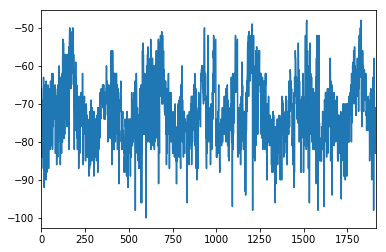

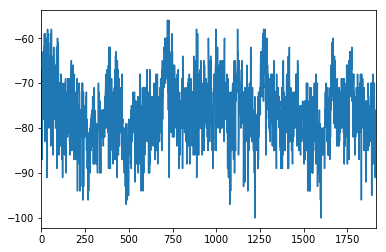

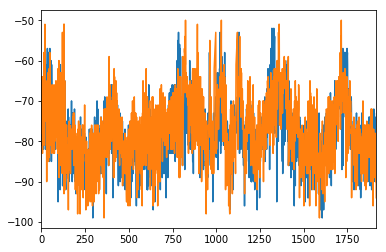

In [161]:
data['Beacon1'].plot()
plt.show()
data['Beacon2'].plot()
plt.show()
data['Beacon3'].plot()
data['Beacon4'].plot()

In [162]:
print(data.shape)
from sklearn.model_selection import train_test_split
X = data.iloc[:,3:]
# print(X)
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaler = scaler.fit_transform(X)
y=data.iloc[:,1:3]
print(X_scaler)
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=42)

X_train

(1916, 10)
[[0.65384615 0.75       0.38297872 ... 0.22       0.29545455 0.32075472]
 [0.55769231 0.45454545 0.55319149 ... 0.74       0.56818182 0.32075472]
 [0.53846154 0.72727273 0.42553191 ... 0.4        0.52272727 0.60377358]
 ...
 [0.48076923 0.36363636 0.53191489 ... 0.36       0.86363636 0.77358491]
 [0.32692308 0.29545455 0.27659574 ... 0.34       0.75       0.77358491]
 [0.53846154 0.29545455 0.4893617  ... 0.34       0.95454545 0.62264151]]


In [163]:
X_train.shape[1]

7

In [164]:
#creating a neuaral network

model = Sequential()
model.add(LSTM(300, input_shape=(1,7,), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(300))
model.add(Dropout(0.2))
model.add(Dense(2, activation='relu'))

model.compile(loss='mse', optimizer='adam')

# Compile the network :
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               1024      
_________________________________________________________________
dense_29 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_30 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 514       
Total params: 100,354
Trainable params: 100,354
Non-trainable params: 0
_________________________________________________________________


In [134]:
NN_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split = 0.2, verbose=2)


Train on 1225 samples, validate on 307 samples
Epoch 1/200
 - 2s - loss: 1.1840 - mean_absolute_error: 1.1840 - mean_squared_error: 3.4702 - val_loss: 2.0674 - val_mean_absolute_error: 2.0674 - val_mean_squared_error: 8.1001
Epoch 2/200
 - 0s - loss: 1.1998 - mean_absolute_error: 1.1998 - mean_squared_error: 3.4754 - val_loss: 2.0940 - val_mean_absolute_error: 2.0940 - val_mean_squared_error: 8.1975
Epoch 3/200
 - 0s - loss: 1.2032 - mean_absolute_error: 1.2032 - mean_squared_error: 3.4662 - val_loss: 2.0855 - val_mean_absolute_error: 2.0855 - val_mean_squared_error: 8.1881
Epoch 4/200
 - 0s - loss: 1.1722 - mean_absolute_error: 1.1722 - mean_squared_error: 3.4114 - val_loss: 2.0627 - val_mean_absolute_error: 2.0627 - val_mean_squared_error: 8.0611
Epoch 5/200
 - 0s - loss: 1.1874 - mean_absolute_error: 1.1874 - mean_squared_error: 3.5166 - val_loss: 2.0593 - val_mean_absolute_error: 2.0593 - val_mean_squared_error: 8.0484
Epoch 6/200
 - 0s - loss: 1.1658 - mean_absolute_error: 1.1658 

Epoch 47/200
 - 0s - loss: 1.1318 - mean_absolute_error: 1.1318 - mean_squared_error: 3.0350 - val_loss: 2.0763 - val_mean_absolute_error: 2.0763 - val_mean_squared_error: 8.0705
Epoch 48/200
 - 0s - loss: 1.0473 - mean_absolute_error: 1.0473 - mean_squared_error: 2.8784 - val_loss: 2.0395 - val_mean_absolute_error: 2.0395 - val_mean_squared_error: 7.9606
Epoch 49/200
 - 0s - loss: 1.0497 - mean_absolute_error: 1.0497 - mean_squared_error: 2.8157 - val_loss: 2.1101 - val_mean_absolute_error: 2.1101 - val_mean_squared_error: 8.2372
Epoch 50/200
 - 0s - loss: 1.0845 - mean_absolute_error: 1.0845 - mean_squared_error: 2.9359 - val_loss: 2.0380 - val_mean_absolute_error: 2.0380 - val_mean_squared_error: 8.1087
Epoch 51/200
 - 0s - loss: 1.0592 - mean_absolute_error: 1.0592 - mean_squared_error: 2.8803 - val_loss: 2.0496 - val_mean_absolute_error: 2.0496 - val_mean_squared_error: 8.0920
Epoch 52/200
 - 0s - loss: 1.0361 - mean_absolute_error: 1.0361 - mean_squared_error: 2.7813 - val_loss: 

Epoch 93/200
 - 0s - loss: 0.9824 - mean_absolute_error: 0.9824 - mean_squared_error: 2.5294 - val_loss: 2.0932 - val_mean_absolute_error: 2.0932 - val_mean_squared_error: 8.3322
Epoch 94/200
 - 0s - loss: 0.9404 - mean_absolute_error: 0.9404 - mean_squared_error: 2.3625 - val_loss: 2.0700 - val_mean_absolute_error: 2.0700 - val_mean_squared_error: 8.2377
Epoch 95/200
 - 0s - loss: 1.0259 - mean_absolute_error: 1.0259 - mean_squared_error: 2.6491 - val_loss: 2.0507 - val_mean_absolute_error: 2.0507 - val_mean_squared_error: 8.1672
Epoch 96/200
 - 0s - loss: 0.9648 - mean_absolute_error: 0.9648 - mean_squared_error: 2.4350 - val_loss: 2.0294 - val_mean_absolute_error: 2.0294 - val_mean_squared_error: 8.0445
Epoch 97/200
 - 0s - loss: 0.9236 - mean_absolute_error: 0.9236 - mean_squared_error: 2.3577 - val_loss: 2.0543 - val_mean_absolute_error: 2.0543 - val_mean_squared_error: 8.0996
Epoch 98/200
 - 0s - loss: 0.9042 - mean_absolute_error: 0.9042 - mean_squared_error: 2.2627 - val_loss: 

Epoch 139/200
 - 0s - loss: 0.8977 - mean_absolute_error: 0.8977 - mean_squared_error: 2.1381 - val_loss: 2.0343 - val_mean_absolute_error: 2.0343 - val_mean_squared_error: 8.2606
Epoch 140/200
 - 0s - loss: 0.8718 - mean_absolute_error: 0.8718 - mean_squared_error: 2.0551 - val_loss: 2.0484 - val_mean_absolute_error: 2.0484 - val_mean_squared_error: 8.1931
Epoch 141/200
 - 0s - loss: 0.8478 - mean_absolute_error: 0.8478 - mean_squared_error: 2.0307 - val_loss: 2.0428 - val_mean_absolute_error: 2.0428 - val_mean_squared_error: 8.3334
Epoch 142/200
 - 0s - loss: 0.8794 - mean_absolute_error: 0.8794 - mean_squared_error: 2.1019 - val_loss: 2.0369 - val_mean_absolute_error: 2.0369 - val_mean_squared_error: 8.2554
Epoch 143/200
 - 0s - loss: 0.8742 - mean_absolute_error: 0.8742 - mean_squared_error: 2.0561 - val_loss: 2.0298 - val_mean_absolute_error: 2.0298 - val_mean_squared_error: 8.2129
Epoch 144/200
 - 0s - loss: 0.8489 - mean_absolute_error: 0.8489 - mean_squared_error: 2.0124 - val_

Epoch 185/200
 - 0s - loss: 0.7851 - mean_absolute_error: 0.7851 - mean_squared_error: 1.7588 - val_loss: 2.0221 - val_mean_absolute_error: 2.0221 - val_mean_squared_error: 8.2393
Epoch 186/200
 - 0s - loss: 0.7855 - mean_absolute_error: 0.7855 - mean_squared_error: 1.7819 - val_loss: 2.0518 - val_mean_absolute_error: 2.0518 - val_mean_squared_error: 8.4803
Epoch 187/200
 - 0s - loss: 0.8114 - mean_absolute_error: 0.8114 - mean_squared_error: 1.7904 - val_loss: 2.0952 - val_mean_absolute_error: 2.0952 - val_mean_squared_error: 8.5005
Epoch 188/200
 - 0s - loss: 0.7983 - mean_absolute_error: 0.7983 - mean_squared_error: 1.8146 - val_loss: 2.0394 - val_mean_absolute_error: 2.0394 - val_mean_squared_error: 8.1570
Epoch 189/200
 - 0s - loss: 0.7833 - mean_absolute_error: 0.7833 - mean_squared_error: 1.7423 - val_loss: 2.0691 - val_mean_absolute_error: 2.0691 - val_mean_squared_error: 8.5833
Epoch 190/200
 - 0s - loss: 0.8199 - mean_absolute_error: 0.8199 - mean_squared_error: 1.8146 - val_

In [136]:
ron =NN_model.predict(X_test)
lol = pd.DataFrame(ron)
lol = lol.rename(columns={0:'a',1:'b'})

In [148]:
lol

,a,b
0,6.745292,2.034043
1,3.326365,10.558079
2,5.967742,-1.370507
3,5.042984,1.583854
4,4.041681,15.030794
...,...,...
379,4.357352,2.886858
380,2.445637,5.289240
381,2.481218,9.573671
382,5.127858,3.413152


In [149]:
y_test
actual_1=pd.DataFrame(np.array(y_test).T)
actual = actual_1.T


In [150]:
actual = actual.rename(columns={0:'x',1:'y'})

In [151]:
actual

,x,y
0,7.1,5.5
1,3.2,3.0
2,6.1,1.5
3,9.5,1.3
4,3.0,8.0
...,...,...
379,6.7,2.5
380,4.5,6.5
381,5.0,10.7
382,5.0,2.5


In [152]:
actual['a']=lol['a']

In [153]:
actual['b'] = lol['b']

In [154]:
actual

,x,y,a,b
0,7.1,5.5,6.745292,2.034043
1,3.2,3.0,3.326365,10.558079
2,6.1,1.5,5.967742,-1.370507
3,9.5,1.3,5.042984,1.583854
4,3.0,8.0,4.041681,15.030794
...,...,...,...,...
379,6.7,2.5,4.357352,2.886858
380,4.5,6.5,2.445637,5.289240
381,5.0,10.7,2.481218,9.573671
382,5.0,2.5,5.127858,3.413152


In [155]:
actual['distance']=np.sqrt((actual['x']-actual['a'])**2+(actual['y']-actual['b'])**2)

In [156]:
actual['distance'].mean()

3.625103918309984

In [157]:
actual

,x,y,a,b,distance
0,7.1,5.5,6.745292,2.034043,3.484061
1,3.2,3.0,3.326365,10.558079,7.559135
2,6.1,1.5,5.967742,-1.370507,2.873552
3,9.5,1.3,5.042984,1.583854,4.466045
4,3.0,8.0,4.041681,15.030794,7.107543
...,...,...,...,...,...
379,6.7,2.5,4.357352,2.886858,2.374375
380,4.5,6.5,2.445637,5.289240,2.384607
381,5.0,10.7,2.481218,9.573671,2.759145
382,5.0,2.5,5.127858,3.413152,0.922059


NameError: name 'create_dataset' is not defined

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=20, verbose=2)

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:

# shift train predictions for plotting

trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting

testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict

# plot baseline and predictions

plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [171]:
from sklearn.model_selection import KFold 
scores = []
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    NN_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split = 0.2, verbose=2)
    ron =NN_model.predict(X_test)
    lol = pd.DataFrame(ron)
    lol = lol.rename(columns={0:'a',1:'b'})
    actual_1=pd.DataFrame(np.array(y_test).T)
    actual = actual_1.T
    actual = actual.rename(columns={0:'x',1:'y'})
    actual['a']=lol['a']
    actual['b'] = lol['b']
    actual['distance']=np.sqrt((actual['x']-actual['a'])**2+(actual['y']-actual['b'])**2)
    mean = actual['distance'].mean()
    scores.append(mean)

C:\Users\poulr\Anaconda32\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Train Index:  [ 192  193  194 ... 1913 1914 1915] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191]
Train on 1379 samples, validate on 345 samples
Epoch 1/200
 - 2s - loss: 97.6185 - mean_absolute_error: 97.6185 - mean_squared_error: 81217.7614 - val_loss

Epoch 42/200
 - 0s - loss: 2.1496 - mean_absolute_error: 2.1496 - mean_squared_error: 8.0592 - val_loss: 2.9604 - val_mean_absolute_error: 2.9604 - val_mean_squared_error: 15.3877
Epoch 43/200
 - 0s - loss: 2.0780 - mean_absolute_error: 2.0780 - mean_squared_error: 7.5683 - val_loss: 3.1290 - val_mean_absolute_error: 3.1290 - val_mean_squared_error: 13.7031
Epoch 44/200
 - 0s - loss: 2.0599 - mean_absolute_error: 2.0599 - mean_squared_error: 7.6062 - val_loss: 3.0048 - val_mean_absolute_error: 3.0048 - val_mean_squared_error: 13.2592
Epoch 45/200
 - 0s - loss: 2.0692 - mean_absolute_error: 2.0692 - mean_squared_error: 7.6218 - val_loss: 3.1265 - val_mean_absolute_error: 3.1265 - val_mean_squared_error: 13.3589
Epoch 46/200
 - 0s - loss: 2.1726 - mean_absolute_error: 2.1726 - mean_squared_error: 8.2666 - val_loss: 3.0942 - val_mean_absolute_error: 3.0942 - val_mean_squared_error: 13.2675
Epoch 47/200
 - 0s - loss: 2.0406 - mean_absolute_error: 2.0406 - mean_squared_error: 7.2962 - val_l

Epoch 88/200
 - 0s - loss: 1.9911 - mean_absolute_error: 1.9911 - mean_squared_error: 7.2135 - val_loss: 2.8198 - val_mean_absolute_error: 2.8198 - val_mean_squared_error: 12.0748
Epoch 89/200
 - 0s - loss: 2.0268 - mean_absolute_error: 2.0268 - mean_squared_error: 7.4342 - val_loss: 2.8157 - val_mean_absolute_error: 2.8157 - val_mean_squared_error: 12.2771
Epoch 90/200
 - 0s - loss: 2.0901 - mean_absolute_error: 2.0901 - mean_squared_error: 7.6967 - val_loss: 2.8497 - val_mean_absolute_error: 2.8497 - val_mean_squared_error: 12.4581
Epoch 91/200
 - 0s - loss: 2.1223 - mean_absolute_error: 2.1223 - mean_squared_error: 7.9014 - val_loss: 2.7869 - val_mean_absolute_error: 2.7869 - val_mean_squared_error: 12.7321
Epoch 92/200
 - 0s - loss: 2.0267 - mean_absolute_error: 2.0267 - mean_squared_error: 7.3482 - val_loss: 2.7797 - val_mean_absolute_error: 2.7797 - val_mean_squared_error: 12.4490
Epoch 93/200
 - 0s - loss: 1.9853 - mean_absolute_error: 1.9853 - mean_squared_error: 7.0980 - val_l

Epoch 134/200
 - 0s - loss: 1.9464 - mean_absolute_error: 1.9464 - mean_squared_error: 6.9726 - val_loss: 2.9463 - val_mean_absolute_error: 2.9463 - val_mean_squared_error: 12.9891
Epoch 135/200
 - 0s - loss: 2.0090 - mean_absolute_error: 2.0090 - mean_squared_error: 7.4020 - val_loss: 2.7864 - val_mean_absolute_error: 2.7864 - val_mean_squared_error: 12.1674
Epoch 136/200
 - 0s - loss: 1.9588 - mean_absolute_error: 1.9588 - mean_squared_error: 7.0249 - val_loss: 2.7911 - val_mean_absolute_error: 2.7911 - val_mean_squared_error: 12.1414
Epoch 137/200
 - 0s - loss: 1.9551 - mean_absolute_error: 1.9551 - mean_squared_error: 6.9955 - val_loss: 2.7955 - val_mean_absolute_error: 2.7955 - val_mean_squared_error: 12.4071
Epoch 138/200
 - 0s - loss: 1.9735 - mean_absolute_error: 1.9735 - mean_squared_error: 7.1368 - val_loss: 3.0160 - val_mean_absolute_error: 3.0160 - val_mean_squared_error: 13.5942
Epoch 139/200
 - 0s - loss: 1.9922 - mean_absolute_error: 1.9922 - mean_squared_error: 7.2504 -

Epoch 180/200
 - 0s - loss: 1.9405 - mean_absolute_error: 1.9405 - mean_squared_error: 6.9728 - val_loss: 2.7925 - val_mean_absolute_error: 2.7925 - val_mean_squared_error: 12.6538
Epoch 181/200
 - 0s - loss: 1.9128 - mean_absolute_error: 1.9128 - mean_squared_error: 6.8950 - val_loss: 2.7942 - val_mean_absolute_error: 2.7942 - val_mean_squared_error: 13.2648
Epoch 182/200
 - 0s - loss: 1.9819 - mean_absolute_error: 1.9819 - mean_squared_error: 7.3801 - val_loss: 2.7434 - val_mean_absolute_error: 2.7434 - val_mean_squared_error: 13.0170
Epoch 183/200
 - 0s - loss: 1.9417 - mean_absolute_error: 1.9417 - mean_squared_error: 7.0913 - val_loss: 2.8652 - val_mean_absolute_error: 2.8652 - val_mean_squared_error: 12.6991
Epoch 184/200
 - 0s - loss: 1.9654 - mean_absolute_error: 1.9654 - mean_squared_error: 7.2216 - val_loss: 2.8836 - val_mean_absolute_error: 2.8836 - val_mean_squared_error: 12.8569
Epoch 185/200
 - 0s - loss: 1.9275 - mean_absolute_error: 1.9275 - mean_squared_error: 6.9989 -

Epoch 21/200
 - 0s - loss: 2.0861 - mean_absolute_error: 2.0861 - mean_squared_error: 8.1871 - val_loss: 2.9307 - val_mean_absolute_error: 2.9307 - val_mean_squared_error: 13.3549
Epoch 22/200
 - 0s - loss: 2.0627 - mean_absolute_error: 2.0627 - mean_squared_error: 8.1142 - val_loss: 2.8343 - val_mean_absolute_error: 2.8343 - val_mean_squared_error: 13.2431
Epoch 23/200
 - 0s - loss: 2.0396 - mean_absolute_error: 2.0396 - mean_squared_error: 8.0998 - val_loss: 2.8007 - val_mean_absolute_error: 2.8007 - val_mean_squared_error: 12.7698
Epoch 24/200
 - 0s - loss: 2.0804 - mean_absolute_error: 2.0804 - mean_squared_error: 8.3458 - val_loss: 2.9059 - val_mean_absolute_error: 2.9059 - val_mean_squared_error: 13.5400
Epoch 25/200
 - 0s - loss: 2.0569 - mean_absolute_error: 2.0569 - mean_squared_error: 8.1596 - val_loss: 2.8493 - val_mean_absolute_error: 2.8493 - val_mean_squared_error: 12.6436
Epoch 26/200
 - 0s - loss: 2.0348 - mean_absolute_error: 2.0348 - mean_squared_error: 7.9563 - val_l

Epoch 67/200
 - 0s - loss: 2.0224 - mean_absolute_error: 2.0224 - mean_squared_error: 8.0249 - val_loss: 2.9317 - val_mean_absolute_error: 2.9317 - val_mean_squared_error: 13.3808
Epoch 68/200
 - 0s - loss: 2.0153 - mean_absolute_error: 2.0153 - mean_squared_error: 7.9113 - val_loss: 2.8644 - val_mean_absolute_error: 2.8644 - val_mean_squared_error: 13.0739
Epoch 69/200
 - 0s - loss: 1.9728 - mean_absolute_error: 1.9728 - mean_squared_error: 7.7365 - val_loss: 2.8859 - val_mean_absolute_error: 2.8859 - val_mean_squared_error: 12.5451
Epoch 70/200
 - 0s - loss: 1.9774 - mean_absolute_error: 1.9774 - mean_squared_error: 7.6908 - val_loss: 2.8140 - val_mean_absolute_error: 2.8140 - val_mean_squared_error: 12.7193
Epoch 71/200
 - 0s - loss: 1.9986 - mean_absolute_error: 1.9986 - mean_squared_error: 7.9689 - val_loss: 2.9508 - val_mean_absolute_error: 2.9508 - val_mean_squared_error: 13.0054
Epoch 72/200
 - 0s - loss: 1.9720 - mean_absolute_error: 1.9720 - mean_squared_error: 7.6850 - val_l

Epoch 113/200
 - 0s - loss: 1.9343 - mean_absolute_error: 1.9343 - mean_squared_error: 7.5555 - val_loss: 2.9542 - val_mean_absolute_error: 2.9542 - val_mean_squared_error: 13.5574
Epoch 114/200
 - 0s - loss: 1.9713 - mean_absolute_error: 1.9713 - mean_squared_error: 7.6921 - val_loss: 3.0453 - val_mean_absolute_error: 3.0453 - val_mean_squared_error: 13.9143
Epoch 115/200
 - 0s - loss: 1.9429 - mean_absolute_error: 1.9429 - mean_squared_error: 7.5445 - val_loss: 2.8470 - val_mean_absolute_error: 2.8470 - val_mean_squared_error: 12.9236
Epoch 116/200
 - 0s - loss: 1.9122 - mean_absolute_error: 1.9122 - mean_squared_error: 7.3463 - val_loss: 2.9181 - val_mean_absolute_error: 2.9181 - val_mean_squared_error: 13.2295
Epoch 117/200
 - 0s - loss: 1.9279 - mean_absolute_error: 1.9279 - mean_squared_error: 7.6144 - val_loss: 3.0150 - val_mean_absolute_error: 3.0150 - val_mean_squared_error: 14.8125
Epoch 118/200
 - 0s - loss: 1.9382 - mean_absolute_error: 1.9382 - mean_squared_error: 7.5729 -

Epoch 159/200
 - 0s - loss: 1.8836 - mean_absolute_error: 1.8836 - mean_squared_error: 7.1883 - val_loss: 2.9322 - val_mean_absolute_error: 2.9322 - val_mean_squared_error: 13.4084
Epoch 160/200
 - 0s - loss: 1.9096 - mean_absolute_error: 1.9096 - mean_squared_error: 7.3517 - val_loss: 3.0836 - val_mean_absolute_error: 3.0836 - val_mean_squared_error: 14.0097
Epoch 161/200
 - 0s - loss: 1.8963 - mean_absolute_error: 1.8963 - mean_squared_error: 7.3908 - val_loss: 2.9745 - val_mean_absolute_error: 2.9745 - val_mean_squared_error: 13.4984
Epoch 162/200
 - 0s - loss: 1.9004 - mean_absolute_error: 1.9004 - mean_squared_error: 7.3556 - val_loss: 3.0827 - val_mean_absolute_error: 3.0827 - val_mean_squared_error: 13.9939
Epoch 163/200
 - 0s - loss: 1.9301 - mean_absolute_error: 1.9301 - mean_squared_error: 7.4425 - val_loss: 2.9507 - val_mean_absolute_error: 2.9507 - val_mean_squared_error: 13.4152
Epoch 164/200
 - 0s - loss: 1.9186 - mean_absolute_error: 1.9186 - mean_squared_error: 7.4743 -

Train on 1379 samples, validate on 345 samples
Epoch 1/200
 - 0s - loss: 1.9063 - mean_absolute_error: 1.9063 - mean_squared_error: 7.2919 - val_loss: 2.8975 - val_mean_absolute_error: 2.8975 - val_mean_squared_error: 13.1826
Epoch 2/200
 - 0s - loss: 1.9018 - mean_absolute_error: 1.9018 - mean_squared_error: 7.3052 - val_loss: 2.9607 - val_mean_absolute_error: 2.9607 - val_mean_squared_error: 13.0067
Epoch 3/200
 - 0s - loss: 1.9385 - mean_absolute_error: 1.9385 - mean_squared_error: 7.4504 - val_loss: 2.8021 - val_mean_absolute_error: 2.8021 - val_mean_squared_error: 12.8951
Epoch 4/200
 - 0s - loss: 1.9200 - mean_absolute_error: 1.9200 - mean_squared_error: 7.2768 - val_loss: 2.9693 - val_mean_absolute_error: 2.9693 - val_mean_squared_error: 13.2972
Epoch 5/200
 - 0s - loss: 1.8872 - mean_absolute_error: 1.8872 - mean_squared_error: 7.1121 - val_loss: 3.0267 - val_mean_absolute_error: 3.0267 - val_mean_squared_error: 13.5350
Epoch 6/200
 - 0s - loss: 1.8879 - mean_absolute_error: 1.

Epoch 47/200
 - 0s - loss: 1.8347 - mean_absolute_error: 1.8347 - mean_squared_error: 6.8956 - val_loss: 2.8768 - val_mean_absolute_error: 2.8768 - val_mean_squared_error: 12.8691
Epoch 48/200
 - 0s - loss: 1.9113 - mean_absolute_error: 1.9113 - mean_squared_error: 7.1154 - val_loss: 2.9370 - val_mean_absolute_error: 2.9370 - val_mean_squared_error: 13.4575
Epoch 49/200
 - 0s - loss: 1.8436 - mean_absolute_error: 1.8436 - mean_squared_error: 6.8903 - val_loss: 2.9202 - val_mean_absolute_error: 2.9202 - val_mean_squared_error: 12.7305
Epoch 50/200
 - 0s - loss: 1.9176 - mean_absolute_error: 1.9176 - mean_squared_error: 7.2863 - val_loss: 2.9185 - val_mean_absolute_error: 2.9185 - val_mean_squared_error: 13.0393
Epoch 51/200
 - 0s - loss: 1.8898 - mean_absolute_error: 1.8898 - mean_squared_error: 7.0546 - val_loss: 3.2096 - val_mean_absolute_error: 3.2096 - val_mean_squared_error: 14.8895
Epoch 52/200
 - 0s - loss: 1.8736 - mean_absolute_error: 1.8736 - mean_squared_error: 7.0342 - val_l

Epoch 93/200
 - 0s - loss: 1.8218 - mean_absolute_error: 1.8218 - mean_squared_error: 6.7006 - val_loss: 2.8305 - val_mean_absolute_error: 2.8305 - val_mean_squared_error: 12.4314
Epoch 94/200
 - 0s - loss: 1.8433 - mean_absolute_error: 1.8433 - mean_squared_error: 6.9838 - val_loss: 2.8213 - val_mean_absolute_error: 2.8213 - val_mean_squared_error: 12.5228
Epoch 95/200
 - 0s - loss: 1.7951 - mean_absolute_error: 1.7951 - mean_squared_error: 6.7121 - val_loss: 2.8786 - val_mean_absolute_error: 2.8786 - val_mean_squared_error: 12.6561
Epoch 96/200
 - 0s - loss: 1.7904 - mean_absolute_error: 1.7904 - mean_squared_error: 6.6213 - val_loss: 2.8758 - val_mean_absolute_error: 2.8758 - val_mean_squared_error: 12.6377
Epoch 97/200
 - 0s - loss: 1.8024 - mean_absolute_error: 1.8024 - mean_squared_error: 6.6947 - val_loss: 2.9068 - val_mean_absolute_error: 2.9068 - val_mean_squared_error: 13.0448
Epoch 98/200
 - 0s - loss: 1.7744 - mean_absolute_error: 1.7744 - mean_squared_error: 6.5575 - val_l

Epoch 139/200
 - 0s - loss: 1.7821 - mean_absolute_error: 1.7821 - mean_squared_error: 6.4593 - val_loss: 2.9240 - val_mean_absolute_error: 2.9240 - val_mean_squared_error: 12.8308
Epoch 140/200
 - 0s - loss: 1.7556 - mean_absolute_error: 1.7556 - mean_squared_error: 6.4551 - val_loss: 2.8394 - val_mean_absolute_error: 2.8394 - val_mean_squared_error: 12.5801
Epoch 141/200
 - 0s - loss: 1.7718 - mean_absolute_error: 1.7718 - mean_squared_error: 6.5770 - val_loss: 3.0294 - val_mean_absolute_error: 3.0294 - val_mean_squared_error: 13.5591
Epoch 142/200
 - 0s - loss: 1.7985 - mean_absolute_error: 1.7985 - mean_squared_error: 6.6163 - val_loss: 2.8680 - val_mean_absolute_error: 2.8680 - val_mean_squared_error: 12.6297
Epoch 143/200
 - 0s - loss: 1.7916 - mean_absolute_error: 1.7916 - mean_squared_error: 6.6034 - val_loss: 2.8270 - val_mean_absolute_error: 2.8270 - val_mean_squared_error: 12.4941
Epoch 144/200
 - 0s - loss: 1.7494 - mean_absolute_error: 1.7494 - mean_squared_error: 6.3377 -

Epoch 185/200
 - 0s - loss: 1.7031 - mean_absolute_error: 1.7031 - mean_squared_error: 6.1661 - val_loss: 2.9362 - val_mean_absolute_error: 2.9362 - val_mean_squared_error: 13.0730
Epoch 186/200
 - 0s - loss: 1.7364 - mean_absolute_error: 1.7364 - mean_squared_error: 6.3482 - val_loss: 2.9603 - val_mean_absolute_error: 2.9603 - val_mean_squared_error: 13.4941
Epoch 187/200
 - 0s - loss: 1.7160 - mean_absolute_error: 1.7160 - mean_squared_error: 6.1958 - val_loss: 3.0077 - val_mean_absolute_error: 3.0077 - val_mean_squared_error: 13.8394
Epoch 188/200
 - 0s - loss: 1.6885 - mean_absolute_error: 1.6885 - mean_squared_error: 6.1156 - val_loss: 2.8959 - val_mean_absolute_error: 2.8959 - val_mean_squared_error: 12.8913
Epoch 189/200
 - 0s - loss: 1.7569 - mean_absolute_error: 1.7569 - mean_squared_error: 6.5619 - val_loss: 3.0002 - val_mean_absolute_error: 3.0002 - val_mean_squared_error: 13.5411
Epoch 190/200
 - 0s - loss: 1.6925 - mean_absolute_error: 1.6925 - mean_squared_error: 6.2542 -

Epoch 26/200
 - 0s - loss: 1.6165 - mean_absolute_error: 1.6165 - mean_squared_error: 5.3194 - val_loss: 3.1287 - val_mean_absolute_error: 3.1287 - val_mean_squared_error: 14.5365
Epoch 27/200
 - 0s - loss: 1.6232 - mean_absolute_error: 1.6232 - mean_squared_error: 5.3532 - val_loss: 3.0973 - val_mean_absolute_error: 3.0973 - val_mean_squared_error: 14.2152
Epoch 28/200
 - 0s - loss: 1.5839 - mean_absolute_error: 1.5839 - mean_squared_error: 5.1992 - val_loss: 2.9799 - val_mean_absolute_error: 2.9799 - val_mean_squared_error: 13.5356
Epoch 29/200
 - 0s - loss: 1.6343 - mean_absolute_error: 1.6343 - mean_squared_error: 5.3955 - val_loss: 3.1195 - val_mean_absolute_error: 3.1195 - val_mean_squared_error: 14.3765
Epoch 30/200
 - 0s - loss: 1.6337 - mean_absolute_error: 1.6337 - mean_squared_error: 5.3803 - val_loss: 3.0158 - val_mean_absolute_error: 3.0158 - val_mean_squared_error: 13.6907
Epoch 31/200
 - 0s - loss: 1.5740 - mean_absolute_error: 1.5740 - mean_squared_error: 5.1508 - val_l

Epoch 72/200
 - 0s - loss: 1.5527 - mean_absolute_error: 1.5527 - mean_squared_error: 5.0591 - val_loss: 2.9852 - val_mean_absolute_error: 2.9852 - val_mean_squared_error: 13.6496
Epoch 73/200
 - 0s - loss: 1.5369 - mean_absolute_error: 1.5369 - mean_squared_error: 4.9975 - val_loss: 3.0749 - val_mean_absolute_error: 3.0749 - val_mean_squared_error: 14.1170
Epoch 74/200
 - 0s - loss: 1.5676 - mean_absolute_error: 1.5676 - mean_squared_error: 5.1478 - val_loss: 3.0832 - val_mean_absolute_error: 3.0832 - val_mean_squared_error: 14.1240
Epoch 75/200
 - 0s - loss: 1.5558 - mean_absolute_error: 1.5558 - mean_squared_error: 5.0196 - val_loss: 2.9441 - val_mean_absolute_error: 2.9441 - val_mean_squared_error: 13.1561
Epoch 76/200
 - 0s - loss: 1.5336 - mean_absolute_error: 1.5336 - mean_squared_error: 4.9891 - val_loss: 3.1238 - val_mean_absolute_error: 3.1238 - val_mean_squared_error: 14.4041
Epoch 77/200
 - 0s - loss: 1.5529 - mean_absolute_error: 1.5529 - mean_squared_error: 5.0542 - val_l

Epoch 118/200
 - 0s - loss: 1.5105 - mean_absolute_error: 1.5105 - mean_squared_error: 4.9175 - val_loss: 3.0169 - val_mean_absolute_error: 3.0169 - val_mean_squared_error: 13.7891
Epoch 119/200
 - 0s - loss: 1.5169 - mean_absolute_error: 1.5169 - mean_squared_error: 4.8707 - val_loss: 2.9411 - val_mean_absolute_error: 2.9411 - val_mean_squared_error: 13.3635
Epoch 120/200
 - 0s - loss: 1.5441 - mean_absolute_error: 1.5441 - mean_squared_error: 4.9697 - val_loss: 2.9608 - val_mean_absolute_error: 2.9608 - val_mean_squared_error: 13.4448
Epoch 121/200
 - 0s - loss: 1.5411 - mean_absolute_error: 1.5411 - mean_squared_error: 5.0084 - val_loss: 3.0619 - val_mean_absolute_error: 3.0619 - val_mean_squared_error: 14.3118
Epoch 122/200
 - 0s - loss: 1.5294 - mean_absolute_error: 1.5294 - mean_squared_error: 4.9501 - val_loss: 3.0459 - val_mean_absolute_error: 3.0459 - val_mean_squared_error: 14.0508
Epoch 123/200
 - 0s - loss: 1.5660 - mean_absolute_error: 1.5660 - mean_squared_error: 5.0744 -

Epoch 164/200
 - 0s - loss: 1.4933 - mean_absolute_error: 1.4933 - mean_squared_error: 4.7105 - val_loss: 3.1566 - val_mean_absolute_error: 3.1566 - val_mean_squared_error: 14.6018
Epoch 165/200
 - 0s - loss: 1.4658 - mean_absolute_error: 1.4658 - mean_squared_error: 4.6275 - val_loss: 3.1505 - val_mean_absolute_error: 3.1505 - val_mean_squared_error: 14.8617
Epoch 166/200
 - 0s - loss: 1.4847 - mean_absolute_error: 1.4847 - mean_squared_error: 4.7320 - val_loss: 3.0442 - val_mean_absolute_error: 3.0442 - val_mean_squared_error: 14.0430
Epoch 167/200
 - 0s - loss: 1.4442 - mean_absolute_error: 1.4442 - mean_squared_error: 4.6296 - val_loss: 3.1848 - val_mean_absolute_error: 3.1848 - val_mean_squared_error: 15.1556
Epoch 168/200
 - 0s - loss: 1.4688 - mean_absolute_error: 1.4688 - mean_squared_error: 4.6773 - val_loss: 2.9709 - val_mean_absolute_error: 2.9709 - val_mean_squared_error: 13.4829
Epoch 169/200
 - 0s - loss: 1.4366 - mean_absolute_error: 1.4366 - mean_squared_error: 4.5289 -

Epoch 5/200
 - 0s - loss: 1.5657 - mean_absolute_error: 1.5657 - mean_squared_error: 5.2824 - val_loss: 3.0374 - val_mean_absolute_error: 3.0374 - val_mean_squared_error: 13.9725
Epoch 6/200
 - 0s - loss: 1.5293 - mean_absolute_error: 1.5293 - mean_squared_error: 5.1805 - val_loss: 2.9590 - val_mean_absolute_error: 2.9590 - val_mean_squared_error: 13.3638
Epoch 7/200
 - 0s - loss: 1.5401 - mean_absolute_error: 1.5401 - mean_squared_error: 5.2156 - val_loss: 2.9575 - val_mean_absolute_error: 2.9575 - val_mean_squared_error: 13.4869
Epoch 8/200
 - 0s - loss: 1.5215 - mean_absolute_error: 1.5215 - mean_squared_error: 5.1838 - val_loss: 2.9544 - val_mean_absolute_error: 2.9544 - val_mean_squared_error: 13.6628
Epoch 9/200
 - 0s - loss: 1.5504 - mean_absolute_error: 1.5504 - mean_squared_error: 5.2482 - val_loss: 3.0357 - val_mean_absolute_error: 3.0357 - val_mean_squared_error: 14.1726
Epoch 10/200
 - 0s - loss: 1.5236 - mean_absolute_error: 1.5236 - mean_squared_error: 5.1190 - val_loss: 

Epoch 51/200
 - 0s - loss: 1.5646 - mean_absolute_error: 1.5646 - mean_squared_error: 5.2404 - val_loss: 2.9080 - val_mean_absolute_error: 2.9080 - val_mean_squared_error: 13.2593
Epoch 52/200
 - 0s - loss: 1.4832 - mean_absolute_error: 1.4832 - mean_squared_error: 4.9653 - val_loss: 3.0015 - val_mean_absolute_error: 3.0015 - val_mean_squared_error: 13.8763
Epoch 53/200
 - 0s - loss: 1.5174 - mean_absolute_error: 1.5174 - mean_squared_error: 5.0772 - val_loss: 2.9405 - val_mean_absolute_error: 2.9405 - val_mean_squared_error: 13.5475
Epoch 54/200
 - 0s - loss: 1.5552 - mean_absolute_error: 1.5552 - mean_squared_error: 5.2653 - val_loss: 2.9685 - val_mean_absolute_error: 2.9685 - val_mean_squared_error: 13.6376
Epoch 55/200
 - 0s - loss: 1.5079 - mean_absolute_error: 1.5079 - mean_squared_error: 4.9569 - val_loss: 2.9533 - val_mean_absolute_error: 2.9533 - val_mean_squared_error: 13.5473
Epoch 56/200
 - 0s - loss: 1.5461 - mean_absolute_error: 1.5461 - mean_squared_error: 5.1872 - val_l

Epoch 97/200
 - 0s - loss: 1.4468 - mean_absolute_error: 1.4468 - mean_squared_error: 4.6693 - val_loss: 2.8865 - val_mean_absolute_error: 2.8865 - val_mean_squared_error: 13.1475
Epoch 98/200
 - 0s - loss: 1.4356 - mean_absolute_error: 1.4356 - mean_squared_error: 4.6950 - val_loss: 3.0242 - val_mean_absolute_error: 3.0242 - val_mean_squared_error: 14.0556
Epoch 99/200
 - 0s - loss: 1.4616 - mean_absolute_error: 1.4616 - mean_squared_error: 4.8448 - val_loss: 2.8457 - val_mean_absolute_error: 2.8457 - val_mean_squared_error: 12.9757
Epoch 100/200
 - 0s - loss: 1.4961 - mean_absolute_error: 1.4961 - mean_squared_error: 5.0000 - val_loss: 2.8885 - val_mean_absolute_error: 2.8885 - val_mean_squared_error: 13.1387
Epoch 101/200
 - 0s - loss: 1.5024 - mean_absolute_error: 1.5024 - mean_squared_error: 4.9454 - val_loss: 2.9501 - val_mean_absolute_error: 2.9501 - val_mean_squared_error: 13.8073
Epoch 102/200
 - 0s - loss: 1.4908 - mean_absolute_error: 1.4908 - mean_squared_error: 4.9606 - va

Epoch 143/200
 - 0s - loss: 1.4134 - mean_absolute_error: 1.4134 - mean_squared_error: 4.5909 - val_loss: 3.0265 - val_mean_absolute_error: 3.0265 - val_mean_squared_error: 14.2522
Epoch 144/200
 - 0s - loss: 1.4002 - mean_absolute_error: 1.4002 - mean_squared_error: 4.4643 - val_loss: 2.9487 - val_mean_absolute_error: 2.9487 - val_mean_squared_error: 13.8208
Epoch 145/200
 - 0s - loss: 1.4717 - mean_absolute_error: 1.4717 - mean_squared_error: 4.8240 - val_loss: 3.0318 - val_mean_absolute_error: 3.0318 - val_mean_squared_error: 14.4621
Epoch 146/200
 - 0s - loss: 1.4468 - mean_absolute_error: 1.4468 - mean_squared_error: 4.6554 - val_loss: 2.8934 - val_mean_absolute_error: 2.8934 - val_mean_squared_error: 13.4129
Epoch 147/200
 - 0s - loss: 1.4396 - mean_absolute_error: 1.4396 - mean_squared_error: 4.6443 - val_loss: 3.0394 - val_mean_absolute_error: 3.0394 - val_mean_squared_error: 14.4483
Epoch 148/200
 - 0s - loss: 1.4804 - mean_absolute_error: 1.4804 - mean_squared_error: 4.8424 -

Epoch 189/200
 - 0s - loss: 1.4676 - mean_absolute_error: 1.4676 - mean_squared_error: 4.6626 - val_loss: 2.9595 - val_mean_absolute_error: 2.9595 - val_mean_squared_error: 13.8302
Epoch 190/200
 - 0s - loss: 1.3862 - mean_absolute_error: 1.3862 - mean_squared_error: 4.4033 - val_loss: 2.9658 - val_mean_absolute_error: 2.9658 - val_mean_squared_error: 13.7424
Epoch 191/200
 - 0s - loss: 1.3965 - mean_absolute_error: 1.3965 - mean_squared_error: 4.5347 - val_loss: 2.9211 - val_mean_absolute_error: 2.9211 - val_mean_squared_error: 13.6369
Epoch 192/200
 - 0s - loss: 1.3774 - mean_absolute_error: 1.3774 - mean_squared_error: 4.5221 - val_loss: 2.9664 - val_mean_absolute_error: 2.9664 - val_mean_squared_error: 13.9722
Epoch 193/200
 - 0s - loss: 1.4028 - mean_absolute_error: 1.4028 - mean_squared_error: 4.5659 - val_loss: 2.8444 - val_mean_absolute_error: 2.8444 - val_mean_squared_error: 13.2147
Epoch 194/200
 - 0s - loss: 1.3733 - mean_absolute_error: 1.3733 - mean_squared_error: 4.3793 -

Epoch 29/200
 - 0s - loss: 1.4812 - mean_absolute_error: 1.4812 - mean_squared_error: 5.1135 - val_loss: 2.9420 - val_mean_absolute_error: 2.9420 - val_mean_squared_error: 13.9355
Epoch 30/200
 - 0s - loss: 1.5364 - mean_absolute_error: 1.5364 - mean_squared_error: 5.2587 - val_loss: 2.9667 - val_mean_absolute_error: 2.9667 - val_mean_squared_error: 13.9778
Epoch 31/200
 - 0s - loss: 1.5134 - mean_absolute_error: 1.5134 - mean_squared_error: 5.2643 - val_loss: 2.9760 - val_mean_absolute_error: 2.9760 - val_mean_squared_error: 13.8642
Epoch 32/200
 - 0s - loss: 1.5058 - mean_absolute_error: 1.5058 - mean_squared_error: 5.0983 - val_loss: 3.0497 - val_mean_absolute_error: 3.0497 - val_mean_squared_error: 14.6485
Epoch 33/200
 - 0s - loss: 1.4872 - mean_absolute_error: 1.4872 - mean_squared_error: 5.1258 - val_loss: 2.9942 - val_mean_absolute_error: 2.9942 - val_mean_squared_error: 14.2731
Epoch 34/200
 - 0s - loss: 1.5484 - mean_absolute_error: 1.5484 - mean_squared_error: 5.3193 - val_l

Epoch 75/200
 - 0s - loss: 1.4060 - mean_absolute_error: 1.4060 - mean_squared_error: 4.7017 - val_loss: 2.9182 - val_mean_absolute_error: 2.9182 - val_mean_squared_error: 13.7127
Epoch 76/200
 - 0s - loss: 1.4046 - mean_absolute_error: 1.4046 - mean_squared_error: 4.7404 - val_loss: 2.9835 - val_mean_absolute_error: 2.9835 - val_mean_squared_error: 14.2652
Epoch 77/200
 - 0s - loss: 1.4240 - mean_absolute_error: 1.4240 - mean_squared_error: 4.7712 - val_loss: 2.9622 - val_mean_absolute_error: 2.9622 - val_mean_squared_error: 14.0914
Epoch 78/200
 - 0s - loss: 1.4434 - mean_absolute_error: 1.4434 - mean_squared_error: 4.8658 - val_loss: 2.8974 - val_mean_absolute_error: 2.8974 - val_mean_squared_error: 13.4091
Epoch 79/200
 - 0s - loss: 1.4138 - mean_absolute_error: 1.4138 - mean_squared_error: 4.7543 - val_loss: 2.9359 - val_mean_absolute_error: 2.9359 - val_mean_squared_error: 13.8137
Epoch 80/200
 - 0s - loss: 1.4304 - mean_absolute_error: 1.4304 - mean_squared_error: 4.8030 - val_l

Epoch 121/200
 - 0s - loss: 1.4080 - mean_absolute_error: 1.4080 - mean_squared_error: 4.6805 - val_loss: 2.9933 - val_mean_absolute_error: 2.9933 - val_mean_squared_error: 14.2463
Epoch 122/200
 - 0s - loss: 1.5515 - mean_absolute_error: 1.5515 - mean_squared_error: 5.2781 - val_loss: 3.0169 - val_mean_absolute_error: 3.0169 - val_mean_squared_error: 14.8795
Epoch 123/200
 - 0s - loss: 1.4064 - mean_absolute_error: 1.4064 - mean_squared_error: 4.6847 - val_loss: 2.9079 - val_mean_absolute_error: 2.9079 - val_mean_squared_error: 13.9651
Epoch 124/200
 - 0s - loss: 1.4114 - mean_absolute_error: 1.4114 - mean_squared_error: 4.6617 - val_loss: 2.9838 - val_mean_absolute_error: 2.9838 - val_mean_squared_error: 14.4318
Epoch 125/200
 - 0s - loss: 1.3839 - mean_absolute_error: 1.3839 - mean_squared_error: 4.6030 - val_loss: 2.9231 - val_mean_absolute_error: 2.9231 - val_mean_squared_error: 13.9300
Epoch 126/200
 - 0s - loss: 1.3993 - mean_absolute_error: 1.3993 - mean_squared_error: 4.6999 -

Epoch 167/200
 - 0s - loss: 1.3383 - mean_absolute_error: 1.3383 - mean_squared_error: 4.3136 - val_loss: 2.9865 - val_mean_absolute_error: 2.9865 - val_mean_squared_error: 14.7682
Epoch 168/200
 - 0s - loss: 1.3698 - mean_absolute_error: 1.3698 - mean_squared_error: 4.4904 - val_loss: 2.9255 - val_mean_absolute_error: 2.9255 - val_mean_squared_error: 13.9379
Epoch 169/200
 - 0s - loss: 1.3814 - mean_absolute_error: 1.3814 - mean_squared_error: 4.5053 - val_loss: 3.1183 - val_mean_absolute_error: 3.1183 - val_mean_squared_error: 15.3131
Epoch 170/200
 - 0s - loss: 1.3891 - mean_absolute_error: 1.3891 - mean_squared_error: 4.5579 - val_loss: 2.8860 - val_mean_absolute_error: 2.8860 - val_mean_squared_error: 13.7091
Epoch 171/200
 - 0s - loss: 1.3966 - mean_absolute_error: 1.3966 - mean_squared_error: 4.5387 - val_loss: 2.9455 - val_mean_absolute_error: 2.9455 - val_mean_squared_error: 14.1118
Epoch 172/200
 - 0s - loss: 1.3629 - mean_absolute_error: 1.3629 - mean_squared_error: 4.4741 -

Epoch 7/200
 - 0s - loss: 1.3985 - mean_absolute_error: 1.3985 - mean_squared_error: 4.6592 - val_loss: 2.9815 - val_mean_absolute_error: 2.9815 - val_mean_squared_error: 14.6708
Epoch 8/200
 - 0s - loss: 1.3700 - mean_absolute_error: 1.3700 - mean_squared_error: 4.5238 - val_loss: 2.9727 - val_mean_absolute_error: 2.9727 - val_mean_squared_error: 14.7176
Epoch 9/200
 - 0s - loss: 1.4278 - mean_absolute_error: 1.4278 - mean_squared_error: 4.6814 - val_loss: 3.0284 - val_mean_absolute_error: 3.0284 - val_mean_squared_error: 14.7350
Epoch 10/200
 - 0s - loss: 1.5333 - mean_absolute_error: 1.5333 - mean_squared_error: 5.1191 - val_loss: 3.0950 - val_mean_absolute_error: 3.0950 - val_mean_squared_error: 15.2829
Epoch 11/200
 - 0s - loss: 1.3994 - mean_absolute_error: 1.3994 - mean_squared_error: 4.6366 - val_loss: 2.9888 - val_mean_absolute_error: 2.9888 - val_mean_squared_error: 14.6606
Epoch 12/200
 - 0s - loss: 1.3739 - mean_absolute_error: 1.3739 - mean_squared_error: 4.5583 - val_loss

Epoch 53/200
 - 0s - loss: 1.3744 - mean_absolute_error: 1.3744 - mean_squared_error: 4.4503 - val_loss: 2.9267 - val_mean_absolute_error: 2.9267 - val_mean_squared_error: 14.1248
Epoch 54/200
 - 0s - loss: 1.3833 - mean_absolute_error: 1.3833 - mean_squared_error: 4.4021 - val_loss: 2.9359 - val_mean_absolute_error: 2.9359 - val_mean_squared_error: 14.3463
Epoch 55/200
 - 0s - loss: 1.3396 - mean_absolute_error: 1.3396 - mean_squared_error: 4.3594 - val_loss: 3.0224 - val_mean_absolute_error: 3.0224 - val_mean_squared_error: 14.7666
Epoch 56/200
 - 0s - loss: 1.3750 - mean_absolute_error: 1.3750 - mean_squared_error: 4.3807 - val_loss: 2.9725 - val_mean_absolute_error: 2.9725 - val_mean_squared_error: 14.6312
Epoch 57/200
 - 0s - loss: 1.3643 - mean_absolute_error: 1.3643 - mean_squared_error: 4.3792 - val_loss: 2.8863 - val_mean_absolute_error: 2.8863 - val_mean_squared_error: 13.7402
Epoch 58/200
 - 0s - loss: 1.4082 - mean_absolute_error: 1.4082 - mean_squared_error: 4.6064 - val_l

Epoch 99/200
 - 0s - loss: 1.3243 - mean_absolute_error: 1.3243 - mean_squared_error: 4.2170 - val_loss: 2.9837 - val_mean_absolute_error: 2.9837 - val_mean_squared_error: 14.7088
Epoch 100/200
 - 0s - loss: 1.3595 - mean_absolute_error: 1.3595 - mean_squared_error: 4.2112 - val_loss: 2.9941 - val_mean_absolute_error: 2.9941 - val_mean_squared_error: 14.7555
Epoch 101/200
 - 0s - loss: 1.3007 - mean_absolute_error: 1.3007 - mean_squared_error: 4.1192 - val_loss: 3.0185 - val_mean_absolute_error: 3.0185 - val_mean_squared_error: 14.8787
Epoch 102/200
 - 0s - loss: 1.5194 - mean_absolute_error: 1.5194 - mean_squared_error: 5.0401 - val_loss: 2.9193 - val_mean_absolute_error: 2.9193 - val_mean_squared_error: 13.7995
Epoch 103/200
 - 0s - loss: 1.4012 - mean_absolute_error: 1.4012 - mean_squared_error: 4.4539 - val_loss: 3.0820 - val_mean_absolute_error: 3.0820 - val_mean_squared_error: 15.4988
Epoch 104/200
 - 0s - loss: 1.3458 - mean_absolute_error: 1.3458 - mean_squared_error: 4.2897 - 

Epoch 145/200
 - 0s - loss: 1.3102 - mean_absolute_error: 1.3102 - mean_squared_error: 4.1308 - val_loss: 3.0359 - val_mean_absolute_error: 3.0359 - val_mean_squared_error: 15.1202
Epoch 146/200
 - 0s - loss: 1.3159 - mean_absolute_error: 1.3159 - mean_squared_error: 4.0997 - val_loss: 3.0457 - val_mean_absolute_error: 3.0457 - val_mean_squared_error: 15.0553
Epoch 147/200
 - 0s - loss: 1.3061 - mean_absolute_error: 1.3061 - mean_squared_error: 4.0695 - val_loss: 2.9661 - val_mean_absolute_error: 2.9661 - val_mean_squared_error: 14.3500
Epoch 148/200
 - 0s - loss: 1.2893 - mean_absolute_error: 1.2893 - mean_squared_error: 4.0265 - val_loss: 2.9989 - val_mean_absolute_error: 2.9989 - val_mean_squared_error: 14.6802
Epoch 149/200
 - 0s - loss: 1.3058 - mean_absolute_error: 1.3058 - mean_squared_error: 4.1683 - val_loss: 3.0413 - val_mean_absolute_error: 3.0413 - val_mean_squared_error: 14.8832
Epoch 150/200
 - 0s - loss: 1.3050 - mean_absolute_error: 1.3050 - mean_squared_error: 4.1031 -

Epoch 191/200
 - 0s - loss: 1.2763 - mean_absolute_error: 1.2763 - mean_squared_error: 3.9636 - val_loss: 3.0976 - val_mean_absolute_error: 3.0976 - val_mean_squared_error: 15.6329
Epoch 192/200
 - 0s - loss: 1.3070 - mean_absolute_error: 1.3070 - mean_squared_error: 4.1060 - val_loss: 3.0360 - val_mean_absolute_error: 3.0360 - val_mean_squared_error: 15.0445
Epoch 193/200
 - 0s - loss: 1.2877 - mean_absolute_error: 1.2877 - mean_squared_error: 3.9858 - val_loss: 3.0512 - val_mean_absolute_error: 3.0512 - val_mean_squared_error: 15.3037
Epoch 194/200
 - 0s - loss: 1.2836 - mean_absolute_error: 1.2836 - mean_squared_error: 3.9002 - val_loss: 3.0596 - val_mean_absolute_error: 3.0596 - val_mean_squared_error: 15.0229
Epoch 195/200
 - 0s - loss: 1.3367 - mean_absolute_error: 1.3367 - mean_squared_error: 4.2083 - val_loss: 3.0911 - val_mean_absolute_error: 3.0911 - val_mean_squared_error: 15.7772
Epoch 196/200
 - 0s - loss: 1.3070 - mean_absolute_error: 1.3070 - mean_squared_error: 4.0297 -

Epoch 31/200
 - 0s - loss: 1.3040 - mean_absolute_error: 1.3040 - mean_squared_error: 4.1983 - val_loss: 2.9556 - val_mean_absolute_error: 2.9556 - val_mean_squared_error: 14.6043
Epoch 32/200
 - 0s - loss: 1.3220 - mean_absolute_error: 1.3220 - mean_squared_error: 4.2217 - val_loss: 3.0503 - val_mean_absolute_error: 3.0503 - val_mean_squared_error: 15.4414
Epoch 33/200
 - 0s - loss: 1.3187 - mean_absolute_error: 1.3187 - mean_squared_error: 4.2194 - val_loss: 3.0151 - val_mean_absolute_error: 3.0151 - val_mean_squared_error: 14.9490
Epoch 34/200
 - 0s - loss: 1.2965 - mean_absolute_error: 1.2965 - mean_squared_error: 4.0881 - val_loss: 3.0445 - val_mean_absolute_error: 3.0445 - val_mean_squared_error: 15.2924
Epoch 35/200
 - 0s - loss: 1.3042 - mean_absolute_error: 1.3042 - mean_squared_error: 4.1453 - val_loss: 2.9658 - val_mean_absolute_error: 2.9658 - val_mean_squared_error: 14.6197
Epoch 36/200
 - 0s - loss: 1.3216 - mean_absolute_error: 1.3216 - mean_squared_error: 4.2022 - val_l

Epoch 77/200
 - 0s - loss: 1.2694 - mean_absolute_error: 1.2694 - mean_squared_error: 4.0325 - val_loss: 3.0292 - val_mean_absolute_error: 3.0292 - val_mean_squared_error: 15.1695
Epoch 78/200
 - 0s - loss: 1.2911 - mean_absolute_error: 1.2911 - mean_squared_error: 4.0677 - val_loss: 3.0455 - val_mean_absolute_error: 3.0455 - val_mean_squared_error: 15.5159
Epoch 79/200
 - 0s - loss: 1.2816 - mean_absolute_error: 1.2816 - mean_squared_error: 4.0814 - val_loss: 3.1041 - val_mean_absolute_error: 3.1041 - val_mean_squared_error: 15.5941
Epoch 80/200
 - 0s - loss: 1.2803 - mean_absolute_error: 1.2803 - mean_squared_error: 4.0711 - val_loss: 3.0297 - val_mean_absolute_error: 3.0297 - val_mean_squared_error: 14.9967
Epoch 81/200
 - 0s - loss: 1.2586 - mean_absolute_error: 1.2586 - mean_squared_error: 3.9736 - val_loss: 2.9777 - val_mean_absolute_error: 2.9777 - val_mean_squared_error: 14.7991
Epoch 82/200
 - 0s - loss: 1.2505 - mean_absolute_error: 1.2505 - mean_squared_error: 3.9559 - val_l

Epoch 123/200
 - 0s - loss: 1.3366 - mean_absolute_error: 1.3366 - mean_squared_error: 4.1659 - val_loss: 3.0939 - val_mean_absolute_error: 3.0939 - val_mean_squared_error: 15.5793
Epoch 124/200
 - 0s - loss: 1.2873 - mean_absolute_error: 1.2873 - mean_squared_error: 4.0320 - val_loss: 3.0551 - val_mean_absolute_error: 3.0551 - val_mean_squared_error: 15.2801
Epoch 125/200
 - 0s - loss: 1.2623 - mean_absolute_error: 1.2623 - mean_squared_error: 3.9296 - val_loss: 3.0410 - val_mean_absolute_error: 3.0410 - val_mean_squared_error: 15.5006
Epoch 126/200
 - 0s - loss: 1.2554 - mean_absolute_error: 1.2554 - mean_squared_error: 3.9126 - val_loss: 3.0627 - val_mean_absolute_error: 3.0627 - val_mean_squared_error: 15.4390
Epoch 127/200
 - 0s - loss: 1.2659 - mean_absolute_error: 1.2659 - mean_squared_error: 3.8703 - val_loss: 3.0146 - val_mean_absolute_error: 3.0146 - val_mean_squared_error: 15.2130
Epoch 128/200
 - 0s - loss: 1.2751 - mean_absolute_error: 1.2751 - mean_squared_error: 3.9487 -

Epoch 169/200
 - 0s - loss: 1.2794 - mean_absolute_error: 1.2794 - mean_squared_error: 3.9817 - val_loss: 3.0601 - val_mean_absolute_error: 3.0601 - val_mean_squared_error: 15.5243
Epoch 170/200
 - 0s - loss: 1.2522 - mean_absolute_error: 1.2522 - mean_squared_error: 3.9081 - val_loss: 3.0113 - val_mean_absolute_error: 3.0113 - val_mean_squared_error: 14.8352
Epoch 171/200
 - 0s - loss: 1.2246 - mean_absolute_error: 1.2246 - mean_squared_error: 3.7204 - val_loss: 3.0135 - val_mean_absolute_error: 3.0135 - val_mean_squared_error: 15.2110
Epoch 172/200
 - 0s - loss: 1.2336 - mean_absolute_error: 1.2336 - mean_squared_error: 3.8307 - val_loss: 3.0291 - val_mean_absolute_error: 3.0291 - val_mean_squared_error: 15.3498
Epoch 173/200
 - 0s - loss: 1.2461 - mean_absolute_error: 1.2461 - mean_squared_error: 3.8225 - val_loss: 3.0960 - val_mean_absolute_error: 3.0960 - val_mean_squared_error: 15.7529
Epoch 174/200
 - 0s - loss: 1.2241 - mean_absolute_error: 1.2241 - mean_squared_error: 3.7185 -

Epoch 9/200
 - 0s - loss: 1.1967 - mean_absolute_error: 1.1967 - mean_squared_error: 3.5848 - val_loss: 2.2861 - val_mean_absolute_error: 2.2861 - val_mean_squared_error: 9.4953
Epoch 10/200
 - 0s - loss: 1.2400 - mean_absolute_error: 1.2400 - mean_squared_error: 3.7633 - val_loss: 2.2738 - val_mean_absolute_error: 2.2738 - val_mean_squared_error: 9.4529
Epoch 11/200
 - 0s - loss: 1.2294 - mean_absolute_error: 1.2294 - mean_squared_error: 3.6691 - val_loss: 2.2942 - val_mean_absolute_error: 2.2942 - val_mean_squared_error: 9.7854
Epoch 12/200
 - 0s - loss: 1.2399 - mean_absolute_error: 1.2399 - mean_squared_error: 3.6602 - val_loss: 2.2701 - val_mean_absolute_error: 2.2701 - val_mean_squared_error: 9.3881
Epoch 13/200
 - 0s - loss: 1.2388 - mean_absolute_error: 1.2388 - mean_squared_error: 3.6906 - val_loss: 2.2719 - val_mean_absolute_error: 2.2719 - val_mean_squared_error: 9.4491
Epoch 14/200
 - 0s - loss: 1.2296 - mean_absolute_error: 1.2296 - mean_squared_error: 3.6509 - val_loss: 2

Epoch 55/200
 - 0s - loss: 1.2560 - mean_absolute_error: 1.2560 - mean_squared_error: 3.8060 - val_loss: 2.2578 - val_mean_absolute_error: 2.2578 - val_mean_squared_error: 9.2909
Epoch 56/200
 - 0s - loss: 1.2000 - mean_absolute_error: 1.2000 - mean_squared_error: 3.6174 - val_loss: 2.3479 - val_mean_absolute_error: 2.3479 - val_mean_squared_error: 10.0754
Epoch 57/200
 - 0s - loss: 1.2309 - mean_absolute_error: 1.2309 - mean_squared_error: 3.7287 - val_loss: 2.2093 - val_mean_absolute_error: 2.2093 - val_mean_squared_error: 8.7824
Epoch 58/200
 - 0s - loss: 1.2166 - mean_absolute_error: 1.2166 - mean_squared_error: 3.6587 - val_loss: 2.3089 - val_mean_absolute_error: 2.3089 - val_mean_squared_error: 9.6513
Epoch 59/200
 - 0s - loss: 1.2326 - mean_absolute_error: 1.2326 - mean_squared_error: 3.7086 - val_loss: 2.3279 - val_mean_absolute_error: 2.3279 - val_mean_squared_error: 9.8726
Epoch 60/200
 - 0s - loss: 1.1854 - mean_absolute_error: 1.1854 - mean_squared_error: 3.5203 - val_loss:

Epoch 101/200
 - 0s - loss: 1.2016 - mean_absolute_error: 1.2016 - mean_squared_error: 3.5354 - val_loss: 2.3412 - val_mean_absolute_error: 2.3412 - val_mean_squared_error: 9.9587
Epoch 102/200
 - 0s - loss: 1.1967 - mean_absolute_error: 1.1967 - mean_squared_error: 3.5217 - val_loss: 2.3127 - val_mean_absolute_error: 2.3127 - val_mean_squared_error: 9.8761
Epoch 103/200
 - 0s - loss: 1.1869 - mean_absolute_error: 1.1869 - mean_squared_error: 3.5526 - val_loss: 2.3140 - val_mean_absolute_error: 2.3140 - val_mean_squared_error: 9.7376
Epoch 104/200
 - 0s - loss: 1.2153 - mean_absolute_error: 1.2153 - mean_squared_error: 3.5967 - val_loss: 2.3100 - val_mean_absolute_error: 2.3100 - val_mean_squared_error: 9.4783
Epoch 105/200
 - 0s - loss: 1.1996 - mean_absolute_error: 1.1996 - mean_squared_error: 3.6065 - val_loss: 2.2804 - val_mean_absolute_error: 2.2804 - val_mean_squared_error: 9.3264
Epoch 106/200
 - 0s - loss: 1.2658 - mean_absolute_error: 1.2658 - mean_squared_error: 3.9025 - val_

Epoch 147/200
 - 0s - loss: 1.2467 - mean_absolute_error: 1.2467 - mean_squared_error: 3.7280 - val_loss: 2.2625 - val_mean_absolute_error: 2.2625 - val_mean_squared_error: 9.2737
Epoch 148/200
 - 0s - loss: 1.1530 - mean_absolute_error: 1.1530 - mean_squared_error: 3.3677 - val_loss: 2.3004 - val_mean_absolute_error: 2.3004 - val_mean_squared_error: 9.6054
Epoch 149/200
 - 0s - loss: 1.1833 - mean_absolute_error: 1.1833 - mean_squared_error: 3.4538 - val_loss: 2.3932 - val_mean_absolute_error: 2.3932 - val_mean_squared_error: 10.1251
Epoch 150/200
 - 0s - loss: 1.1832 - mean_absolute_error: 1.1832 - mean_squared_error: 3.5155 - val_loss: 2.2747 - val_mean_absolute_error: 2.2747 - val_mean_squared_error: 9.3359
Epoch 151/200
 - 0s - loss: 1.2423 - mean_absolute_error: 1.2423 - mean_squared_error: 3.6763 - val_loss: 2.2608 - val_mean_absolute_error: 2.2608 - val_mean_squared_error: 9.2373
Epoch 152/200
 - 0s - loss: 1.1832 - mean_absolute_error: 1.1832 - mean_squared_error: 3.5333 - val

Epoch 193/200
 - 0s - loss: 1.2296 - mean_absolute_error: 1.2296 - mean_squared_error: 3.6651 - val_loss: 2.3143 - val_mean_absolute_error: 2.3143 - val_mean_squared_error: 9.6814
Epoch 194/200
 - 0s - loss: 1.1902 - mean_absolute_error: 1.1902 - mean_squared_error: 3.4597 - val_loss: 2.3854 - val_mean_absolute_error: 2.3854 - val_mean_squared_error: 10.2638
Epoch 195/200
 - 0s - loss: 1.2116 - mean_absolute_error: 1.2116 - mean_squared_error: 3.5556 - val_loss: 2.4078 - val_mean_absolute_error: 2.4078 - val_mean_squared_error: 10.1531
Epoch 196/200
 - 0s - loss: 1.1808 - mean_absolute_error: 1.1808 - mean_squared_error: 3.4477 - val_loss: 2.2960 - val_mean_absolute_error: 2.2960 - val_mean_squared_error: 9.5634
Epoch 197/200
 - 0s - loss: 1.1997 - mean_absolute_error: 1.1997 - mean_squared_error: 3.4844 - val_loss: 2.3363 - val_mean_absolute_error: 2.3363 - val_mean_squared_error: 9.6586
Epoch 198/200
 - 0s - loss: 1.1654 - mean_absolute_error: 1.1654 - mean_squared_error: 3.4093 - va

Epoch 33/200
 - 0s - loss: 1.2057 - mean_absolute_error: 1.2057 - mean_squared_error: 3.5144 - val_loss: 2.3274 - val_mean_absolute_error: 2.3274 - val_mean_squared_error: 11.2697
Epoch 34/200
 - 0s - loss: 1.2077 - mean_absolute_error: 1.2077 - mean_squared_error: 3.5520 - val_loss: 2.3009 - val_mean_absolute_error: 2.3009 - val_mean_squared_error: 10.7516
Epoch 35/200
 - 0s - loss: 1.1989 - mean_absolute_error: 1.1989 - mean_squared_error: 3.5058 - val_loss: 2.3064 - val_mean_absolute_error: 2.3064 - val_mean_squared_error: 10.4290
Epoch 36/200
 - 0s - loss: 1.1461 - mean_absolute_error: 1.1461 - mean_squared_error: 3.3036 - val_loss: 2.2750 - val_mean_absolute_error: 2.2750 - val_mean_squared_error: 10.4804
Epoch 37/200
 - 0s - loss: 1.1826 - mean_absolute_error: 1.1826 - mean_squared_error: 3.4254 - val_loss: 2.2577 - val_mean_absolute_error: 2.2577 - val_mean_squared_error: 10.2109
Epoch 38/200
 - 0s - loss: 1.1857 - mean_absolute_error: 1.1857 - mean_squared_error: 3.4350 - val_l

Epoch 79/200
 - 0s - loss: 1.1464 - mean_absolute_error: 1.1464 - mean_squared_error: 3.3044 - val_loss: 2.3211 - val_mean_absolute_error: 2.3211 - val_mean_squared_error: 10.9739
Epoch 80/200
 - 0s - loss: 1.1537 - mean_absolute_error: 1.1537 - mean_squared_error: 3.2684 - val_loss: 2.2929 - val_mean_absolute_error: 2.2929 - val_mean_squared_error: 10.8144
Epoch 81/200
 - 0s - loss: 1.1435 - mean_absolute_error: 1.1435 - mean_squared_error: 3.2359 - val_loss: 2.3007 - val_mean_absolute_error: 2.3007 - val_mean_squared_error: 10.8118
Epoch 82/200
 - 0s - loss: 1.1425 - mean_absolute_error: 1.1425 - mean_squared_error: 3.2957 - val_loss: 2.3327 - val_mean_absolute_error: 2.3327 - val_mean_squared_error: 11.0774
Epoch 83/200
 - 0s - loss: 1.1390 - mean_absolute_error: 1.1390 - mean_squared_error: 3.2659 - val_loss: 2.2709 - val_mean_absolute_error: 2.2709 - val_mean_squared_error: 10.7848
Epoch 84/200
 - 0s - loss: 1.1230 - mean_absolute_error: 1.1230 - mean_squared_error: 3.2620 - val_l

Epoch 125/200
 - 0s - loss: 1.1259 - mean_absolute_error: 1.1259 - mean_squared_error: 3.2599 - val_loss: 2.3476 - val_mean_absolute_error: 2.3476 - val_mean_squared_error: 11.0171
Epoch 126/200
 - 0s - loss: 1.1647 - mean_absolute_error: 1.1647 - mean_squared_error: 3.4109 - val_loss: 2.2561 - val_mean_absolute_error: 2.2561 - val_mean_squared_error: 10.3828
Epoch 127/200
 - 0s - loss: 1.1727 - mean_absolute_error: 1.1727 - mean_squared_error: 3.3307 - val_loss: 2.3190 - val_mean_absolute_error: 2.3190 - val_mean_squared_error: 10.8549
Epoch 128/200
 - 0s - loss: 1.1487 - mean_absolute_error: 1.1487 - mean_squared_error: 3.2808 - val_loss: 2.2776 - val_mean_absolute_error: 2.2776 - val_mean_squared_error: 10.3854
Epoch 129/200
 - 0s - loss: 1.1671 - mean_absolute_error: 1.1671 - mean_squared_error: 3.3984 - val_loss: 2.3533 - val_mean_absolute_error: 2.3533 - val_mean_squared_error: 11.3284
Epoch 130/200
 - 0s - loss: 1.1651 - mean_absolute_error: 1.1651 - mean_squared_error: 3.3817 -

Epoch 171/200
 - 0s - loss: 1.1238 - mean_absolute_error: 1.1238 - mean_squared_error: 3.2245 - val_loss: 2.2824 - val_mean_absolute_error: 2.2824 - val_mean_squared_error: 10.6418
Epoch 172/200
 - 0s - loss: 1.1492 - mean_absolute_error: 1.1492 - mean_squared_error: 3.3492 - val_loss: 2.3284 - val_mean_absolute_error: 2.3284 - val_mean_squared_error: 10.9043
Epoch 173/200
 - 0s - loss: 1.1701 - mean_absolute_error: 1.1701 - mean_squared_error: 3.3344 - val_loss: 2.3748 - val_mean_absolute_error: 2.3748 - val_mean_squared_error: 11.5483
Epoch 174/200
 - 0s - loss: 1.1390 - mean_absolute_error: 1.1390 - mean_squared_error: 3.2434 - val_loss: 2.3158 - val_mean_absolute_error: 2.3158 - val_mean_squared_error: 10.8457
Epoch 175/200
 - 0s - loss: 1.1410 - mean_absolute_error: 1.1410 - mean_squared_error: 3.2927 - val_loss: 2.3188 - val_mean_absolute_error: 2.3188 - val_mean_squared_error: 10.9080
Epoch 176/200
 - 0s - loss: 1.1127 - mean_absolute_error: 1.1127 - mean_squared_error: 3.2196 -

In [173]:
scores

[5.928535982803257,
 3.0087617292892155,
 3.1181064446318927,
 4.64095586177004,
 3.5992782714616927,
 2.910803102749654,
 2.973212752910833,
 2.2208126082888815,
 4.545121269732887,
 4.830587773264248]

Text(0.5,0,'LSTM')

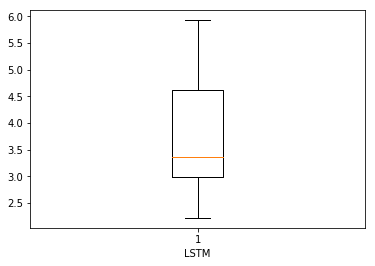

In [175]:
plt.boxplot(scores)
plt.xlabel('LSTM')